In [6]:
import imp
import data_preparation
imp.reload(data_preparation)
df, df_sdt, ents_srt, exts_srt, means, stds, ents, entropy = data_preparation.get()

Dataframe size:  (3330, 37)
Purged dataframe size:  (3210, 37)
Dropping demo-num-have_ig because it's constant
Dropping bool-does_follow_infl because it's constant


In [7]:
# Subset for clustering

# len("num-visit_sponsored_page;num-interact_w_sponsored_brand;num-do_referral_brand;num-cross_information;num-direct_brand_communication;num-did_buy_via_infl;num-did_referred_sponsored_item;num-wannabe_infl".split(";"))

#df_sdt = df_sdt[df_sdt.columns.values[-20:]]
#df_sdt = 
df_subset = df_sdt[df_sdt.columns.values[-6:]].join(df_sdt[df_sdt.columns.values[:5]]).copy()
df_subset.head()

,beauty,travel,fashion,food,fitness,tech,age,studies,gender,ig_since,ig_time_daily
4,0.0,1.0,0.0,0.0,0.0,1.0,0.5,0.4,0.5,0.333333,0.333333
6,1.0,0.0,1.0,0.0,0.0,0.0,0.5,0.4,0.0,0.333333,0.333333
7,0.0,1.0,1.0,0.0,0.0,0.0,0.5,0.6,0.0,0.666667,0.666667
8,0.0,0.0,1.0,1.0,0.0,0.0,0.5,0.6,0.0,0.333333,0.333333
11,1.0,0.0,1.0,0.0,0.0,0.0,0.5,0.6,0.0,0.666667,0.000000


In [8]:
X = df_subset.values
print("Matrix size: ", X.shape)

Matrix size:  (3210, 11)


In [9]:
from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

# PCA ANALYSIS
pca = PCA(n_components=X.shape[1]).fit(X)
ninty_cutoff, seventyfive_cutoff = False, False
for ix, variance in enumerate(pca.explained_variance_ratio_.cumsum()):
    if ix == 3:
        print("Variance explained in 3 dimensions: ", variance)
    if (variance >= 0.75) & (not seventyfive_cutoff):
        seventyfive_cutoff = True
        print('0.75 cutoff -> ', ix)
    if (variance >= 0.9) & (not ninty_cutoff):
        ninty_cutoff = True
        print('0.90 cutoff -> ', ix)

Variance explained in 3 dimensions:  0.7270400343392389
0.75 cutoff ->  4
0.90 cutoff ->  6


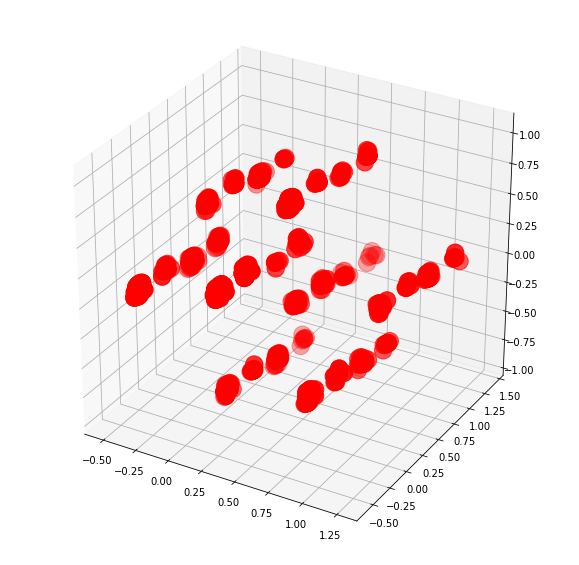

In [10]:
from mpl_toolkits.mplot3d import axes3d, Axes3D

pca_3d = PCA(n_components=3).fit_transform(X)
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(pca_3d[:, 0], pca_3d[:, 1], pca_3d[:, 2], s=300, c='r', marker='o')

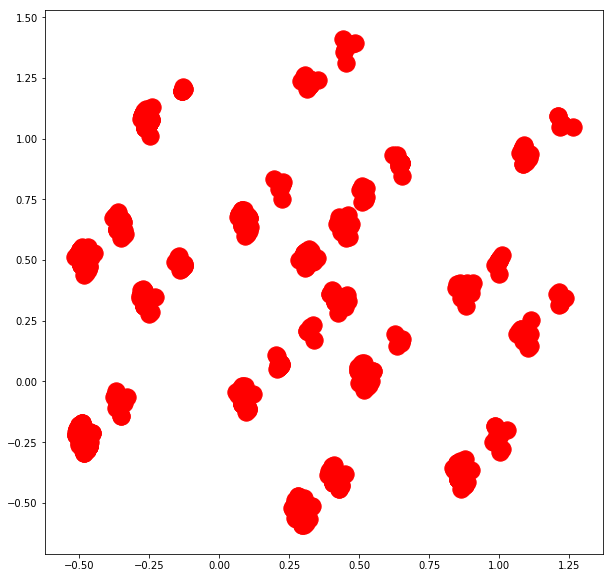

In [11]:
pca_2d = PCA(n_components=2).fit_transform(X)
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111)
ax.scatter(pca_2d[:, 0], pca_2d[:, 1], s=300, c='r', marker='o')

Average inertia: 227.3510489046247



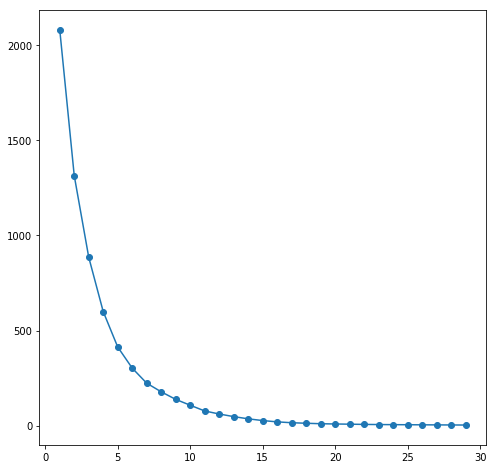

In [16]:
distortions = []
for i in range(1, int(30)):
    # print("Fitting {} clusters".format(i))
    distortions.append(KMeans(n_clusters=i, init='k-means++').fit(PCA(n_components=3).fit_transform(X)).inertia_)
print("Average inertia: {}".format(sum(distortions)/len(distortions)))
print()

plt.figure(figsize=(8,8));
plt.plot(range(1, int(30)), distortions, marker='o');

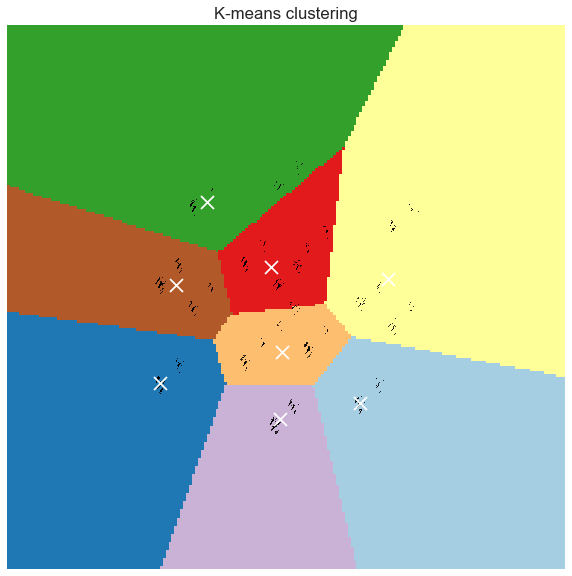

In [27]:
import pandas as pd
import numpy as np

clusters = 8
X_to_be_used = PCA(n_components=3).fit_transform(X)

clustering = pd.DataFrame(data=KMeans(n_clusters=clusters, init='k-means++').fit_predict(X_to_be_used))

reduced_data_plot = PCA(n_components=2).fit_transform(X)
kmeans = KMeans(n_clusters=clusters, init='k-means++').fit(reduced_data_plot)

# Step size of the mesh. Decrease to increase the quality of the VQ.
h = .02     # point in the mesh [x_min, x_max]x[y_min, y_max].

# Plot the decision boundary. For that, we will assign a color to each
x_min, x_max = reduced_data_plot[:, 0].min() - 1, reduced_data_plot[:, 0].max() + 1
y_min, y_max = reduced_data_plot[:, 1].min() - 1, reduced_data_plot[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Obtain labels for each point in mesh. Use last trained model.
Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(1, figsize=(10,10))
plt.clf()
plt.imshow(Z, interpolation='nearest',
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap=plt.cm.Paired,
           aspect='auto', origin='lower')

plt.plot(reduced_data_plot[:, 0], reduced_data_plot[:, 1], 'k.', markersize=2)
# Plot the centroids as a white X
centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1],
            marker='x', s=169, linewidths=3,
            color='w', zorder=10)
plt.title('K-means clustering')
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())
plt.show()

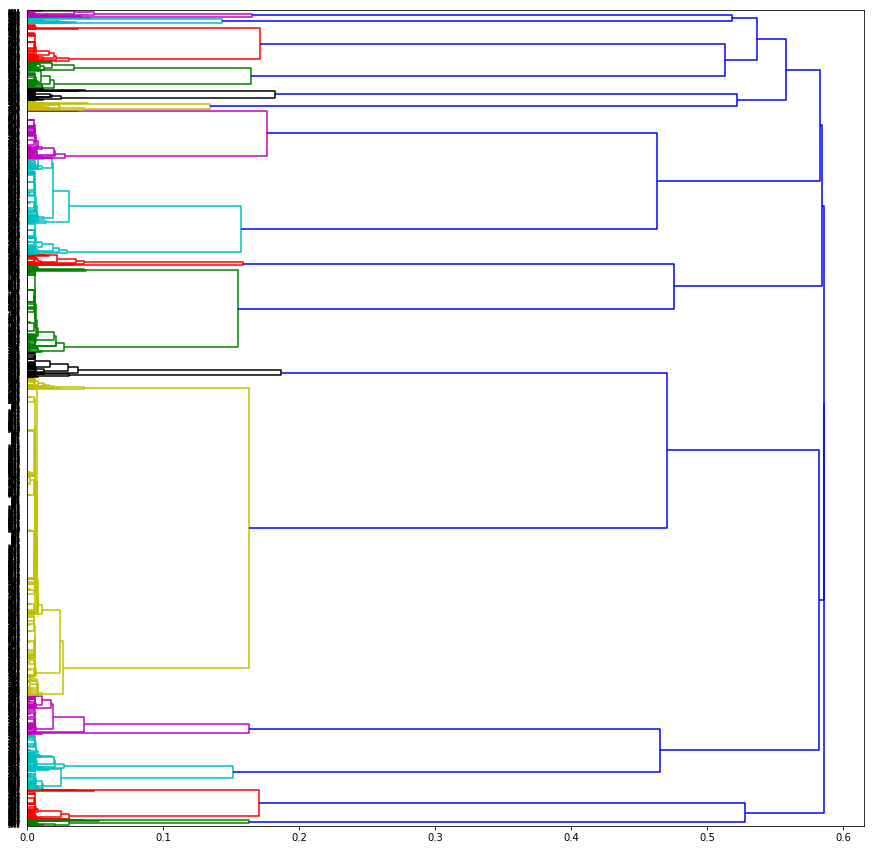

<Figure size 432x288 with 0 Axes>

In [19]:
plt.figure(figsize=(15,15))
dendrogram(
            linkage(X_to_be_used),
            orientation='right',
            distance_sort='descending',
            show_leaf_counts=True,
          )
plt.show()
plt.tight_layout()

In [20]:
pca_3d_results = PCA(n_components=3).fit_transform(X)
pca_2d_results = PCA(n_components=2).fit_transform(X)
df_subset['pca_3d_1'] = pca_3d_results[:, 0]
df_subset['pca_3d_2'] = pca_3d_results[:, 1]
df_subset['pca_3d_3'] = pca_3d_results[:, 2]
df_subset['pca_2d_1'] = pca_2d_results[:, 0]
df_subset['pca_2d_2'] = pca_2d_results[:, 1]
df_subset['k_full'] = KMeans(n_clusters=6, init='k-means++').fit_predict(X)
df_subset['k_pca'] = KMeans(n_clusters=6, init='k-means++').fit_predict(PCA(n_components=0.99).fit_transform(X))
df_subset.head()

,beauty,travel,fashion,food,fitness,tech,age,studies,gender,ig_since,ig_time_daily,pca_3d_1,pca_3d_2,pca_3d_3,pca_2d_1,pca_2d_2,k_full,k_pca
4,0.0,1.0,0.0,0.0,0.0,1.0,0.5,0.4,0.5,0.333333,0.333333,0.899419,0.383657,-0.501594,0.899419,0.383657,5,2
6,1.0,0.0,1.0,0.0,0.0,0.0,0.5,0.4,0.0,0.333333,0.333333,-0.484576,-0.219757,-0.032126,-0.484576,-0.219757,2,3
7,0.0,1.0,1.0,0.0,0.0,0.0,0.5,0.6,0.0,0.666667,0.666667,0.862379,-0.380182,-0.402475,0.862379,-0.380182,5,2
8,0.0,0.0,1.0,1.0,0.0,0.0,0.5,0.6,0.0,0.333333,0.333333,0.519732,0.038232,0.868410,0.519732,0.038232,1,1
11,1.0,0.0,1.0,0.0,0.0,0.0,0.5,0.6,0.0,0.666667,0.000000,-0.474044,-0.212941,-0.031636,-0.474044,-0.212941,2,3


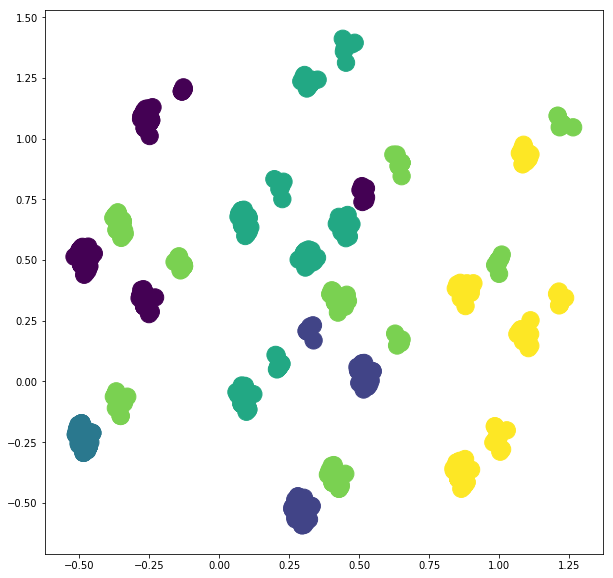

In [21]:
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111)
ax.scatter(df_subset['pca_2d_1'].values, 
           df_subset['pca_2d_2'].values, 
           s=300, 
           c=df_subset['k_full'].values, 
           marker='o')

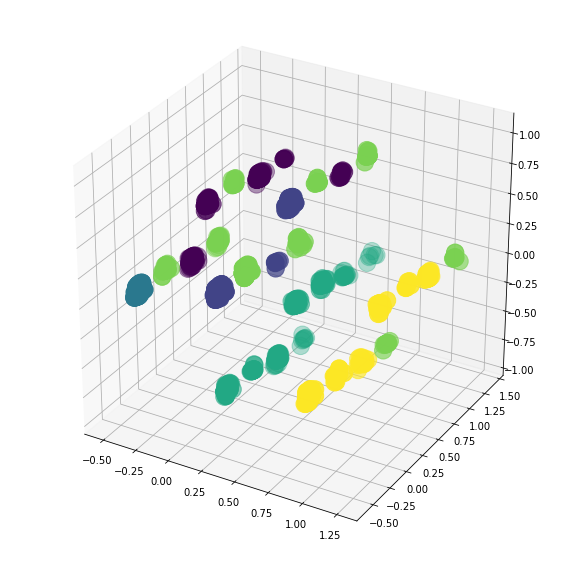

In [22]:
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df_subset['pca_3d_1'].values, 
           df_subset['pca_3d_2'].values, 
           df_subset['pca_3d_3'].values,
           c=df_subset['k_full'].values,
           s=300, marker='o')

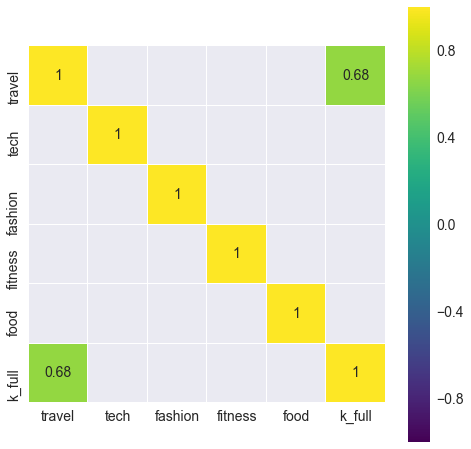

In [23]:
import seaborn as sns

corr = df_subset[['travel', 'tech', 'fashion', 'fitness', 'food', 'k_full']].corr() 
plt.figure(figsize=(8, 8));
sns.set(font_scale=1.4)
sns.heatmap(corr[(corr >= 0.5) | (corr <= -0.4)], 
            cmap='viridis', vmax=1.0, vmin=-1.0, linewidths=0.1,
            annot=True, annot_kws={"size": 14}, square=True);

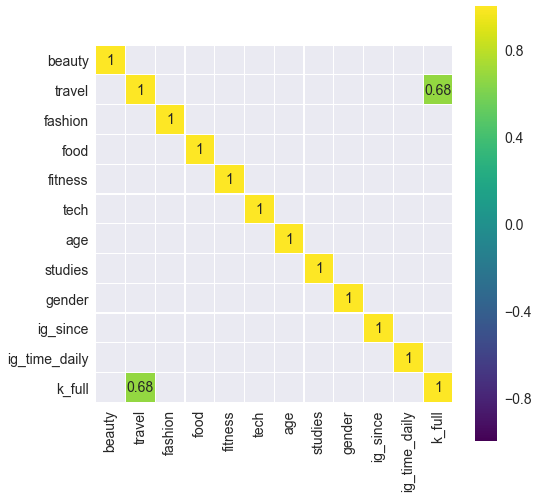

In [24]:
import seaborn as sns

corr = df_subset[[c for c in df_subset.columns.values if 'pca' not in c]].corr() 
plt.figure(figsize=(8, 8));
sns.set(font_scale=1.4)
sns.heatmap(corr[(corr >= 0.5) | (corr <= -0.4)], 
            cmap='viridis', vmax=1.0, vmin=-1.0, linewidths=0.1,
            annot=True, annot_kws={"size": 14}, square=True);

In [25]:
from matplotlib import pyplot as plt

def plot_frequencies(k, df_to_plot, df_reference):
    rows = int(df_to_plot.shape[1]/3)+(df_to_plot.shape[1]%3>0)
    cols = 3
    fig, ax = plt.subplots(rows, cols, figsize=(15,10))
    fig.suptitle("k = {}".format(k), fontsize=24)
    answer = 0
    for row in range(rows):
        for col in range(cols):
            if (answer == df_to_plot.shape[1]):
                break
            feature_name = df_to_plot.columns.values[answer]
            cc = df_to_plot[feature_name]
            cc_ref = df_reference[feature_name]
            if feature_name == "k":
                continue
            # For distribution -> sns.distplot(cc, ax=ax[row, col])
            # sns.countplot(cc, ax=ax[row, col])
            graph_df = cc_ref.value_counts(normalize=True).apply(lambda x: round(x,2)).rename('all').to_frame() \
                       .join(cc.value_counts(normalize=True).apply(lambda x: round(x,2)).rename("k={}".format(k)).to_frame()) \
                       .fillna(0)
            graph_df.index = [round(x, 2) for x in graph_df.index.values]
            graph_df.plot(kind='bar', ax=ax[row, col], rot=0, 
                          title=feature_name, legend=answer==0,
                          fontsize=10)
            if answer == 0:
                ax[row, col].legend(loc='best', prop={'size': 12})
            box_content = "{} {} ± {} \n {} {} ± {}".format(
                "" if answer != 0 else "k={}: ".format(k),
                round(cc.mean(), 2),
                round(cc.std(), 2),
                "" if answer != 0 else "all: ".format(k),
                round(cc_ref.mean(), 2),
                round(cc_ref.std(), 2),
            )
            ax[row, col].text(0.5, 0.5, box_content, 
                              fontsize=13, 
                              horizontalalignment='center', 
                              verticalalignment='center', 
                              transform=ax[row, col].transAxes,
                              bbox=dict(facecolor='red', alpha=0.5))
            answer += 1
    fig.tight_layout()
    plt.subplots_adjust(top=0.85)

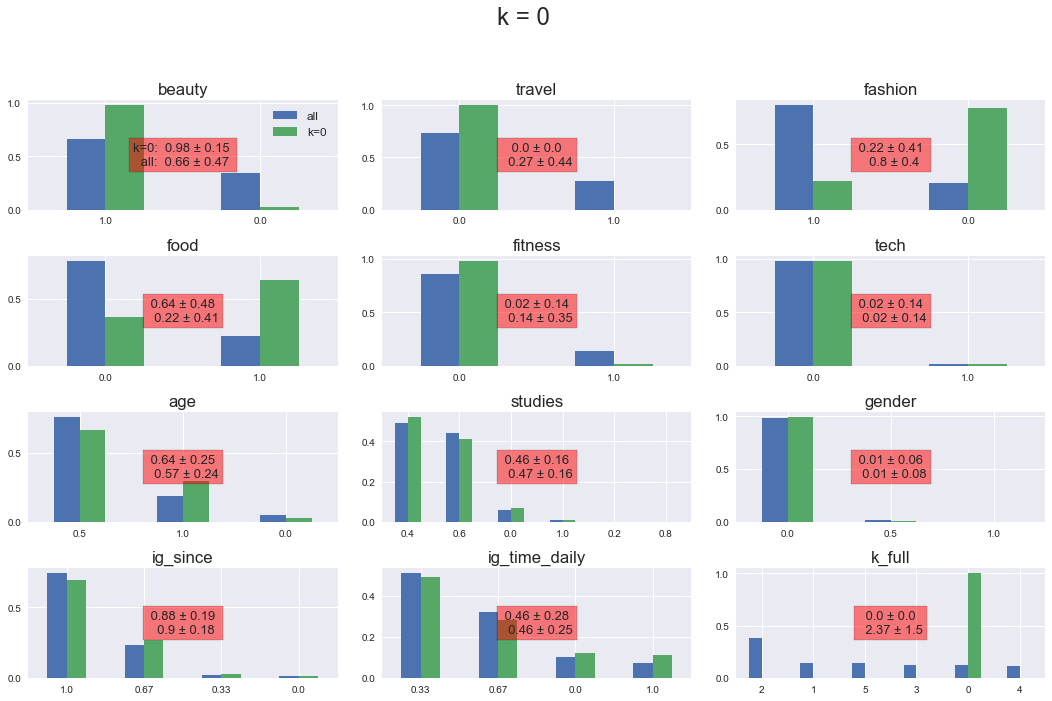

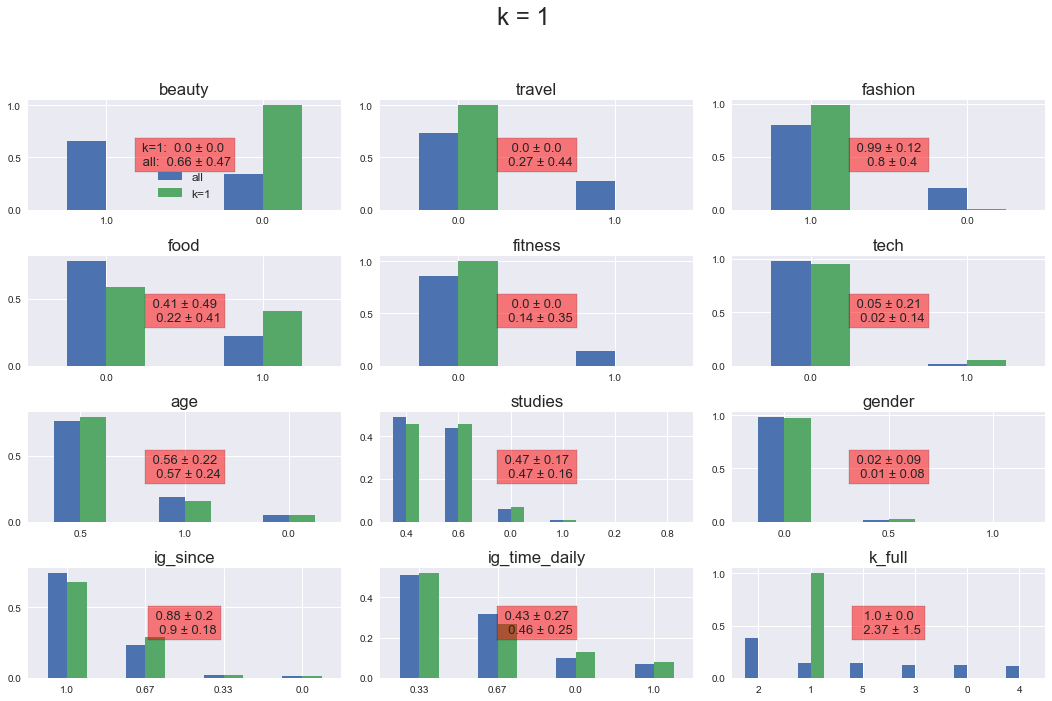

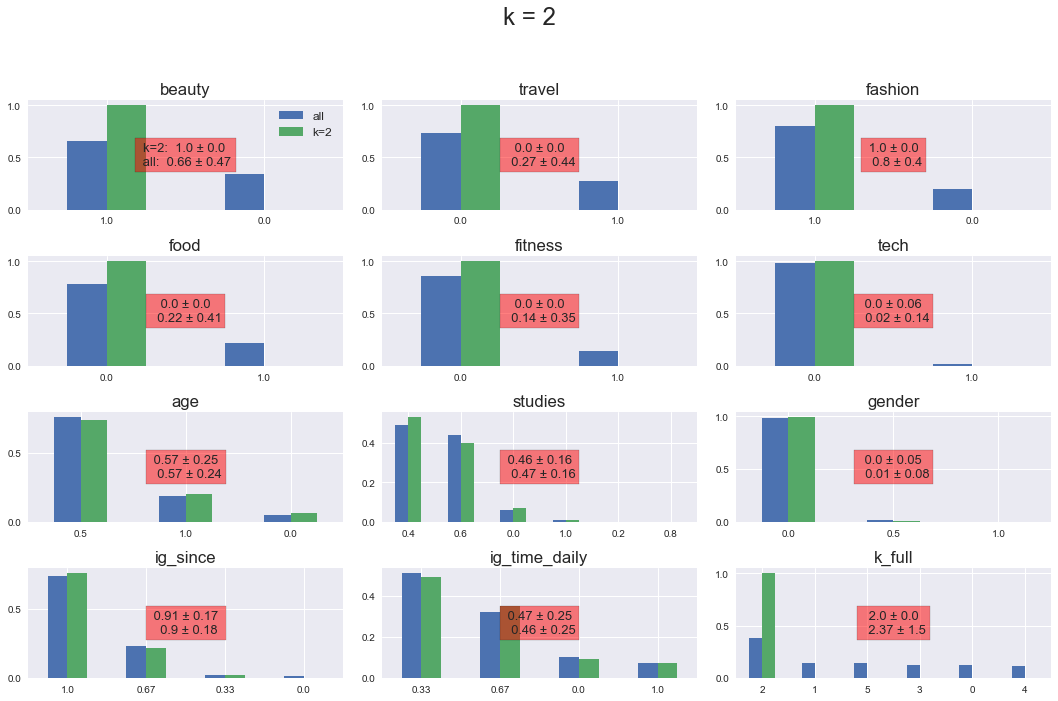

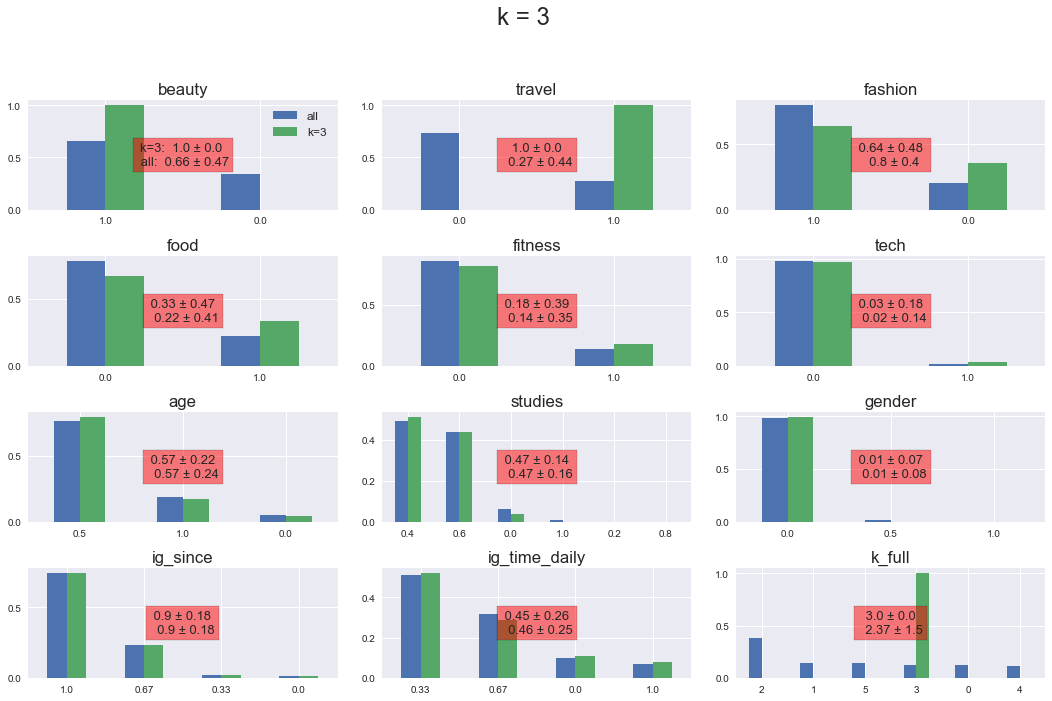

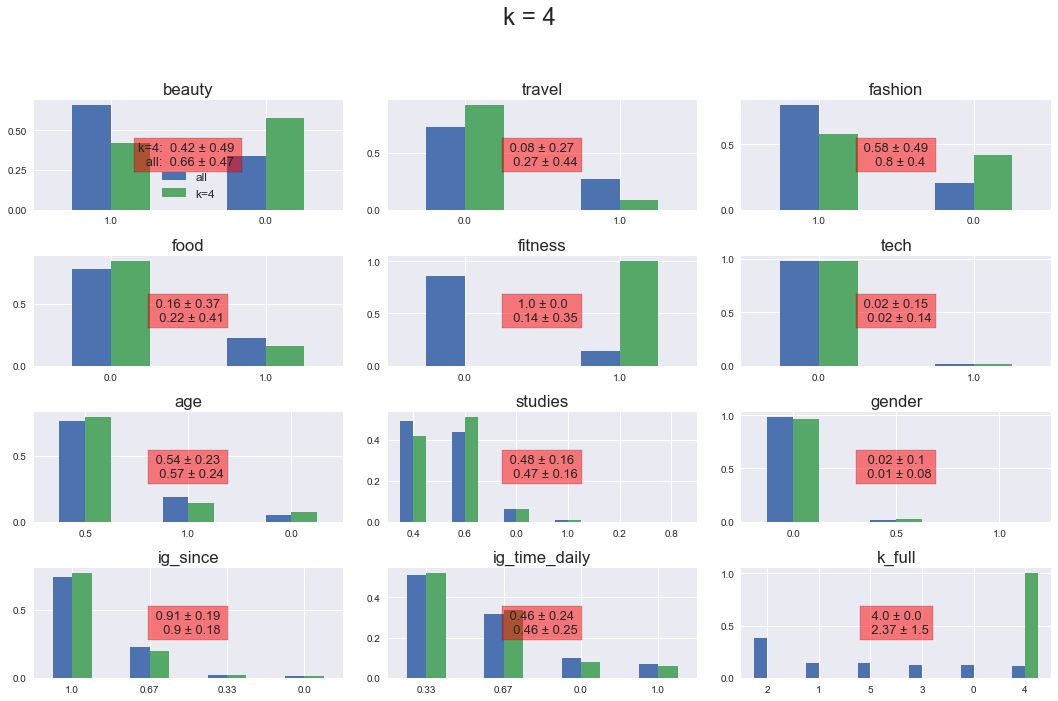

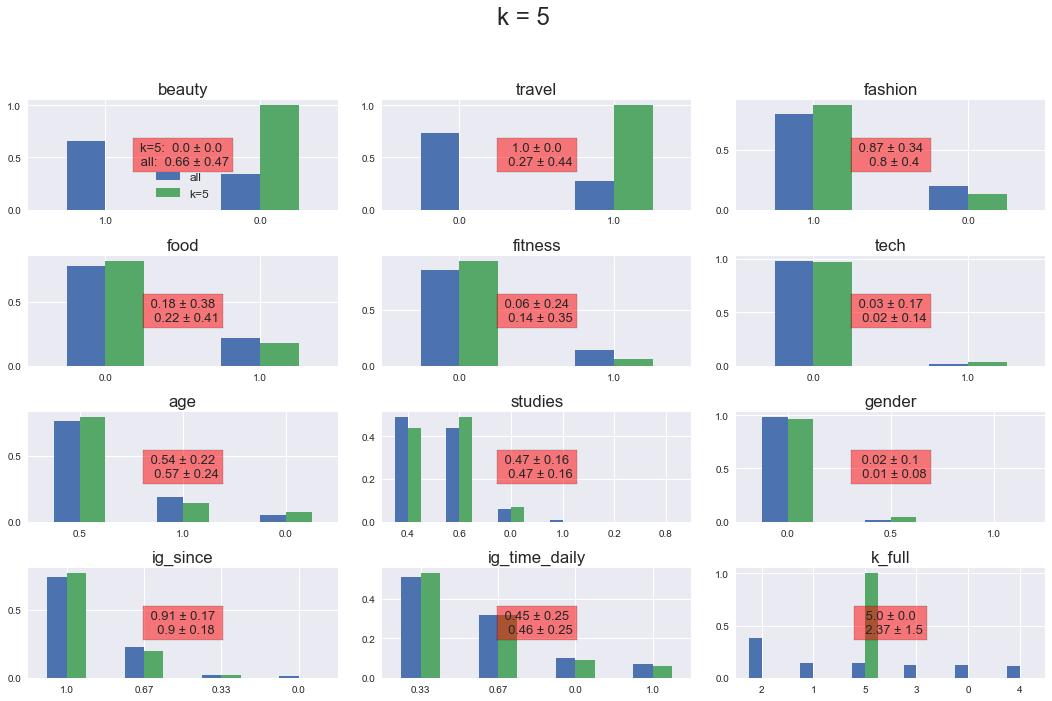

In [26]:
for k in range(6):
    df_reference = (df_subset[[c for c in df_subset.columns.values if 'pca' not in c]])
    df_to_be_plot = df_reference[df_subset.k_full == k]
    plot_frequencies(k, df_to_be_plot, df_reference)